### A/B テスト（p.46～）
サイトA,Bのコンバージョン率の推定

In [1]:
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np

事前情報が無い場合、確率は一様分布に基づくとする。

In [2]:
p = pm.Uniform('p', lower=0, upper=1)

観測データの生成

In [15]:
p_true = 0.05
N = 1500

occurrences = pm.rbernoulli(p_true, N)
print(occurrences)

[False False False ..., False False False]


観測データに基づき、条件付き確率分布を生成

In [16]:
obs = pm.Bernoulli("obs", p, value=occurrences, observed=True)

In [19]:
mcmc = pm.MCMC([p, obs])
mcmc.sample(20000,1000)

 [-----------------100%-----------------] 20000 of 20000 complete in 1.2 sec

事後確率の推定<br>
観測データにより、一様分布が以下のように更新された。

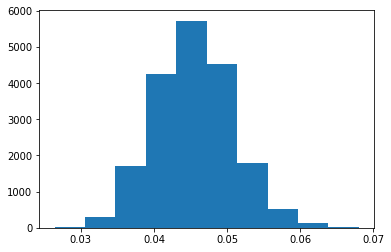

In [20]:
p_samples = mcmc.trace('p')[:]
plt.hist(p_samples)
plt.show()

A/B両方を推定

In [22]:
p_true_A = 0.05
N_A = 1500
p_true_B = 0.04
N_B = 750

p_A = pm.Uniform('p_A', lower=0, upper=1)
p_B = pm.Uniform('p_B', lower=0, upper=1)

occurrences_A = pm.rbernoulli(p_true_A, N_A)
occurrences_B = pm.rbernoulli(p_true_B, N_B)
obs_A = pm.Bernoulli("obs_A", p_A, value=occurrences_A, observed=True)
obs_B = pm.Bernoulli("obs_B", p_B, value=occurrences_B, observed=True)

In [23]:
mcmc = pm.MCMC([p_A, obs_A, p_B, obs_B])
mcmc.sample(20000,1000)

 [-----------------100%-----------------] 20000 of 20000 complete in 1.7 sec

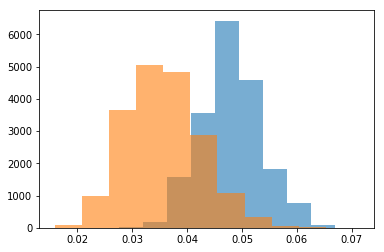

In [32]:
p_samples_A = mcmc.trace('p_A')[:]
plt.hist(p_samples_A, alpha=0.6)
p_samples_B = mcmc.trace('p_B')[:]
plt.hist(p_samples_B, alpha=0.6)
plt.show()

AとBの差も推論する。

In [34]:
@pm.deterministic
def delta(p_A=p_A, p_B=p_B):
    return p_A - p_B

In [35]:
mcmc = pm.MCMC([p_A, obs_A, p_B, obs_B, delta])
mcmc.sample(20000,1000)

 [-----------------100%-----------------] 20000 of 20000 complete in 1.9 sec

0.012259461633308068

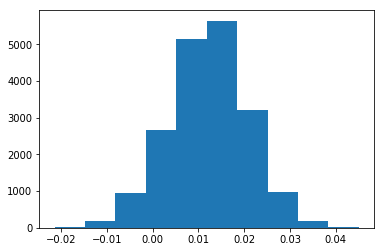

In [38]:
p_samples_delta = mcmc.trace('delta')[:]
plt.hist(p_samples_delta)
p_samples_delta.mean()